**Exercícios Rotulação de Componentes Conexos**
exercícios obtidos em http://homepages.inf.ed.ac.uk/rbf/HIPR2/label.htm


1. Implemente o algoritmo de rotulação de componentes conexos (algoritmo do slide ou por outra solução) e aplique sobre a imagem binária art8.png. Indique qual vizinhança será considerada (4 ou 8)
Mostre os resultados na forma da imagem art8lab1.png e art8lab2.png

art8.png: 
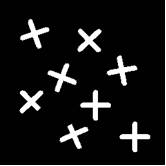
art8lab1.png: 
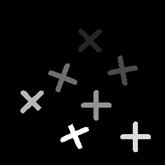
art8lab2.png: 
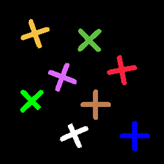
		

In [137]:
import cv2
import numpy as np

# Carrega a imagem
img = cv2.imread('art8.png', cv2.IMREAD_GRAYSCALE)



def rotular_componentes_conexos(img, vizinhanca):
    img_copy = img.copy()
    etiqueta_atual = 1
    etiquetas = np.zeros_like(img_copy)

    # Define a lista de pontos vizinhos
    def cria_lista():
        return []

    # Define a classe Ponto
    class Ponto:
        def __init__(self, x, y):
            self.x = x
            self.y = y

    # Percorre a imagem em busca de pixels 1 não rotulados
    for i in range(img_copy.shape[0]):
        for j in range(img_copy.shape[1]):
            if img_copy[i, j] == 255 and etiquetas[i, j] == 0:
                # Atribui a etiqueta atual ao pixel não rotulado
                np.put(etiquetas, i * etiquetas.shape[1] + j, etiqueta_atual)
                # Adiciona o ponto na lista de busca
                lista_proximos = cria_lista()
                lista_proximos.append(Ponto(i, j))

                # Busca por pixels 1 na vizinhança dos pontos da lista de busca
                while lista_proximos:
                    p_atual = lista_proximos.pop(0)

                    if vizinhanca == 4:
                        vizinhos = [(p_atual.x-1, p_atual.y), (p_atual.x+1, p_atual.y),
                                    (p_atual.x, p_atual.y-1), (p_atual.x, p_atual.y+1)]
                    else:
                        vizinhos = [(p_atual.x-1, p_atual.y-1), (p_atual.x-1, p_atual.y), (p_atual.x-1, p_atual.y+1), (p_atual.x, p_atual.y -1),
                                    (p_atual.x, p_atual.y+1), (p_atual.x+1, p_atual.y-1), (p_atual.x+1, p_atual.y), (p_atual.x+1, p_atual.y+1)]

                    for k in vizinhos:
                        if k[0] >= 0 and k[0] < img_copy.shape[0] and k[1] >= 0 and k[1] < img_copy.shape[1]:
                            if img_copy[k[0], k[1]] == 255 and etiquetas[k[0], k[1]] == 0:
                                etiquetas[k[0], k[1]] = etiqueta_atual
                                lista_proximos.append(Ponto(k[0], k[1]))

                # Incrementa a etiqueta atual para o próximo componente conexo
                etiqueta_atual += 1

#Define a vizinhança
vizinhanca = 8

img2 = img.copy();
# Chama a função de rotulação
rotular_componentes_conexos(img2, vizinhanca)

# Calcula o valor máximo que a imagem rotulada pode ter
n_componentes = np.max(etiquetas)
max_val = 255 // n_componentes if n_componentes > 0 else 0

# Gera as imagens rotuladas
img_lab1 = np.zeros_like(etiquetas, dtype=np.uint8)
for i in range(1, etiqueta_atual):
    img_lab1[etiquetas == i] = int(i * max_val)
cv2.imwrite('art8lab1.png', img_lab1)

vizinhanca = 4
rotular_componentes_conexos(img, vizinhanca)


img_lab2 = np.zeros_like(etiquetas, dtype=np.uint8)
for i in range(1, etiqueta_atual):
    img_lab2[etiquetas == i] = int(i * max_val)
cv2.imwrite('art8lab2.png', img_lab2)
print(max_val, n_componentes)


31 8


2. Calcule o número de objetos da imagem clc3.png. Note que antes será necessário binarizar a imagem. Para isso, considere um limiar (*threshold*) de 67, isto é, valores acima de 67 na imagem original recebem zero, e os abaixo recebem 1 (o que resulta na imagem clc3thr1.png).

clc3.png
![clc3.png](clc3.png)
clc3thr1
![clc3thr1.png](clc3thr1.png)
clc3lab1
![clc3lab1.png](clc3lab1.png)
		

Número de objetos na imagem:  217


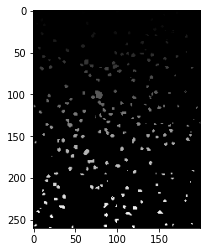

In [128]:
import cv2

# Lê a imagem
img = cv2.imread('clc3.png', cv2.IMREAD_GRAYSCALE)

# Aplica o threshold
thresh_value = 167
ret, img_thr = cv2.threshold(img, thresh_value, 255, cv2.THRESH_BINARY_INV)

def rotular_componentes_conexos(img, vizinhanca):
    img_copy = img.copy()
    etiqueta_atual = 1
    etiquetas = np.zeros_like(img_copy)

    # Define a lista de pontos vizinhos
    def cria_lista():
        return []

    # Define a classe Ponto
    class Ponto:
        def __init__(self, x, y):
            self.x = x
            self.y = y

    # Percorre a imagem em busca de pixels 1 não rotulados
    for i in range(img_copy.shape[0]):
        for j in range(img_copy.shape[1]):
            if img_copy[i, j] == 255 and etiquetas[i, j] == 0:
                # Atribui a etiqueta atual ao pixel não rotulado
                np.put(etiquetas, i * etiquetas.shape[1] + j, etiqueta_atual)
                # Adiciona o ponto na lista de busca
                lista_proximos = cria_lista()
                lista_proximos.append(Ponto(i, j))

                # Busca por pixels 1 na vizinhança dos pontos da lista de busca
                while lista_proximos:
                    p_atual = lista_proximos.pop(0)

                    if vizinhanca == 4:
                        vizinhos = [(p_atual.x-1, p_atual.y), (p_atual.x+1, p_atual.y),
                                    (p_atual.x, p_atual.y-1), (p_atual.x, p_atual.y+1)]
                    else:
                        vizinhos = [(p_atual.x-1, p_atual.y-1), (p_atual.x-1, p_atual.y), (p_atual.x-1, p_atual.y+1),                                    (p_atual.x, p_atual.y -
                                                                                                                                                          1),                                    (p_atual.x, p_atual.y+1), (p_atual.x+1, p_atual.y-1), (p_atual.x+1, p_atual.y), (p_atual.x+1, p_atual.y+1)]

                    for k in vizinhos:
                        if k[0] >= 0 and k[0] < img_copy.shape[0] and k[1] >= 0 and k[1] < img_copy.shape[1]:
                            if img_copy[k[0], k[1]] == 255 and etiquetas[k[0], k[1]] == 0:
                                etiquetas[k[0], k[1]] = etiqueta_atual
                                lista_proximos.append(Ponto(k[0], k[1]))

                # Incrementa a etiqueta atual para o próximo componente conexo
                etiqueta_atual += 1
                
# Aplica a rotulação de componentes
rotular_componentes_conexos(img_thr,8)

# Mostra os resultados

print("Número de objetos na imagem: ", n_components - 1)

plt.imshow(img_labeled, cmap="gray")
plt.show()
